In [1]:
import obspy
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import util
from scipy.fft import fft, ifft, fftfreq, rfft
import pickle
from obspy import UTCDateTime
import scipy.signal as signal

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'
# root = '/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/other/data/2019_01_01/'

In [3]:
#%%script false --no-raise-error
eq_list = os.listdir(root)

client = Client("IRIS")

cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out


In [4]:
# cat_with_data[0:2]

In [5]:
os.listdir(root)

['20190131_194949.a',
 '20190131_193909.a',
 '20190131_143157.a',
 '20190131_130953.a',
 '20190131_130350.a',
 '20190131_125458.a',
 '20190131_101656.a',
 '20190131_085520.a',
 '20190131_082011.a',
 '20190131_054201.a',
 '20190131_044030.a',
 '20190131_035250.a',
 '20190131_031714.a',
 '20190131_031336.a',
 '20190131_001648.a',
 '20190130_231259.a',
 '20190130_225434.a',
 '20190130_221651.a',
 '20190130_210253.a',
 '20190130_185847.a',
 '20190130_175902.a',
 '20190130_174239.a',
 '20190130_174144.a',
 '20190130_173810.a',
 '20190130_114102.a',
 '20190130_113539.a',
 '20190130_080048.a',
 '20190130_074445.a',
 '20190130_072209.a',
 '20190130_052437.a',
 '20190130_052135.a',
 '20190130_050435.a',
 '20190130_024012.a',
 '20190130_022146.a',
 '20190130_003453.a',
 '20190129_225252.a',
 '20190129_214922.a',
 '20190129_212904.a',
 '20190129_202534.a',
 '20190129_191019.a',
 '20190129_162451.a',
 '20190129_125345.a',
 '20190129_115904.a',
 '20190129_093702.a',
 '20190129_002113.a',
 '20190128

In [6]:
for eq_name in eq_with_data:
    try:
        with open(root+eq_name+'/picks.pkl', 'rb') as f:
            picks = pickle.load(f)
        print(eq_name + "successful")
        print(len(picks))
    except:
        print(eq_name + 'failed')
        

20190131_194949.asuccessful
3
20190131_130953.asuccessful
1
20190131_130350.asuccessful
1
20190131_101656.asuccessful
1
20190131_085520.asuccessful
12
20190131_082011.asuccessful
2
20190131_054201.asuccessful
1
20190131_044030.asuccessful
0
20190131_035250.asuccessful
12
20190131_031714.asuccessful
0
20190131_031336.asuccessful
16
20190131_001648.asuccessful
1
20190130_231259.asuccessful
1
20190130_225434.asuccessful
1
20190130_221651.asuccessful
2
20190130_210253.asuccessful
2
20190130_185847.asuccessful
0
20190130_114102.asuccessful
2
20190130_080048.asuccessful
117
20190130_074445.asuccessful
1
20190130_072209.asuccessful
1
20190130_052135.asuccessful
2
20190130_050435.asuccessful
1
20190130_024012.asuccessful
103
20190130_022146.asuccessful
1
20190130_003453.asuccessful
1
20190129_225252.asuccessful
2
20190129_214922.asuccessful
1
20190129_212904.asuccessful
14
20190129_202534.asuccessful
3
20190129_191019.asuccessful
1
20190129_125345.asuccessful
2
20190129_115904.asuccessful
15
2

20190423_081759.asuccessful
1
20190423_032403.asuccessful
43
20190423_015611.asuccessful
0
20190423_010910.asuccessful
0
20190422_232101.asuccessful
4
20190422_224932.asuccessful
0
20190422_221919.asuccessful
11
20190422_193640.asuccessful
7
20190422_182954.asuccessful
0
20190422_142011.asuccessful
15
20190422_131748.asuccessful
2
20190422_105127.asuccessful
14
20190422_081250.asuccessful
43
20190422_075000.asuccessful
1
20190422_054509.asuccessful
10
20190422_050246.asuccessful
17
20190422_020433.asuccessful
5
20190421_221814.asuccessful
0
20190421_210951.asuccessful
1
20190421_194844.asuccessful
11
20190421_163141.asuccessful
0
20190421_134732.asuccessful
2
20190421_132742.asuccessful
5
20190421_121922.asuccessful
1
20190421_114621.asuccessful
5
20190421_100010.asuccessful
1
20190421_055312.asuccessful
0
20190420_232345.asuccessful
4
20190420_223249.asuccessful
6
20190420_144149.asuccessful
4
20190420_035133.asuccessful
2
20190420_000005.asuccessful
1
20190419_213740.asuccessful
6
20

20190603_061430.asuccessful
3
20190603_053808.asuccessful
2
20190603_042225.asuccessful
21
20190603_030829.asuccessful
6
20190603_023435.asuccessful
2
20190603_005124.asuccessful
4
20190602_230849.asuccessful
4
20190602_220815.asuccessful
0
20190602_213453.asuccessful
0
20190602_205147.asuccessful
0
20190602_200455.asuccessful
63
20190602_200117.asuccessful
6
20190602_194929.asuccessful
7
20190602_180124.asuccessful
0
20190602_174043.asuccessful
0
20190602_171258.asuccessful
32
20190602_161117.asuccessful
2
20190602_142225.asuccessful
0
20190602_140806.asuccessful
0
20190602_135943.asuccessful
0
20190602_135148.asuccessful
0
20190602_134728.asuccessful
1
20190602_133909.asuccessful
0
20190602_132809.asuccessful
1
20190602_130847.asuccessful
5
20190602_112902.asuccessful
3
20190602_104114.asuccessful
0
20190602_032116.asuccessful
9
20190602_021948.asuccessful
70
20190602_015235.asuccessful
9
20190601_215937.asuccessful
15
20190601_202608.asuccessful
6
20190601_185014.asuccessful
5
20190

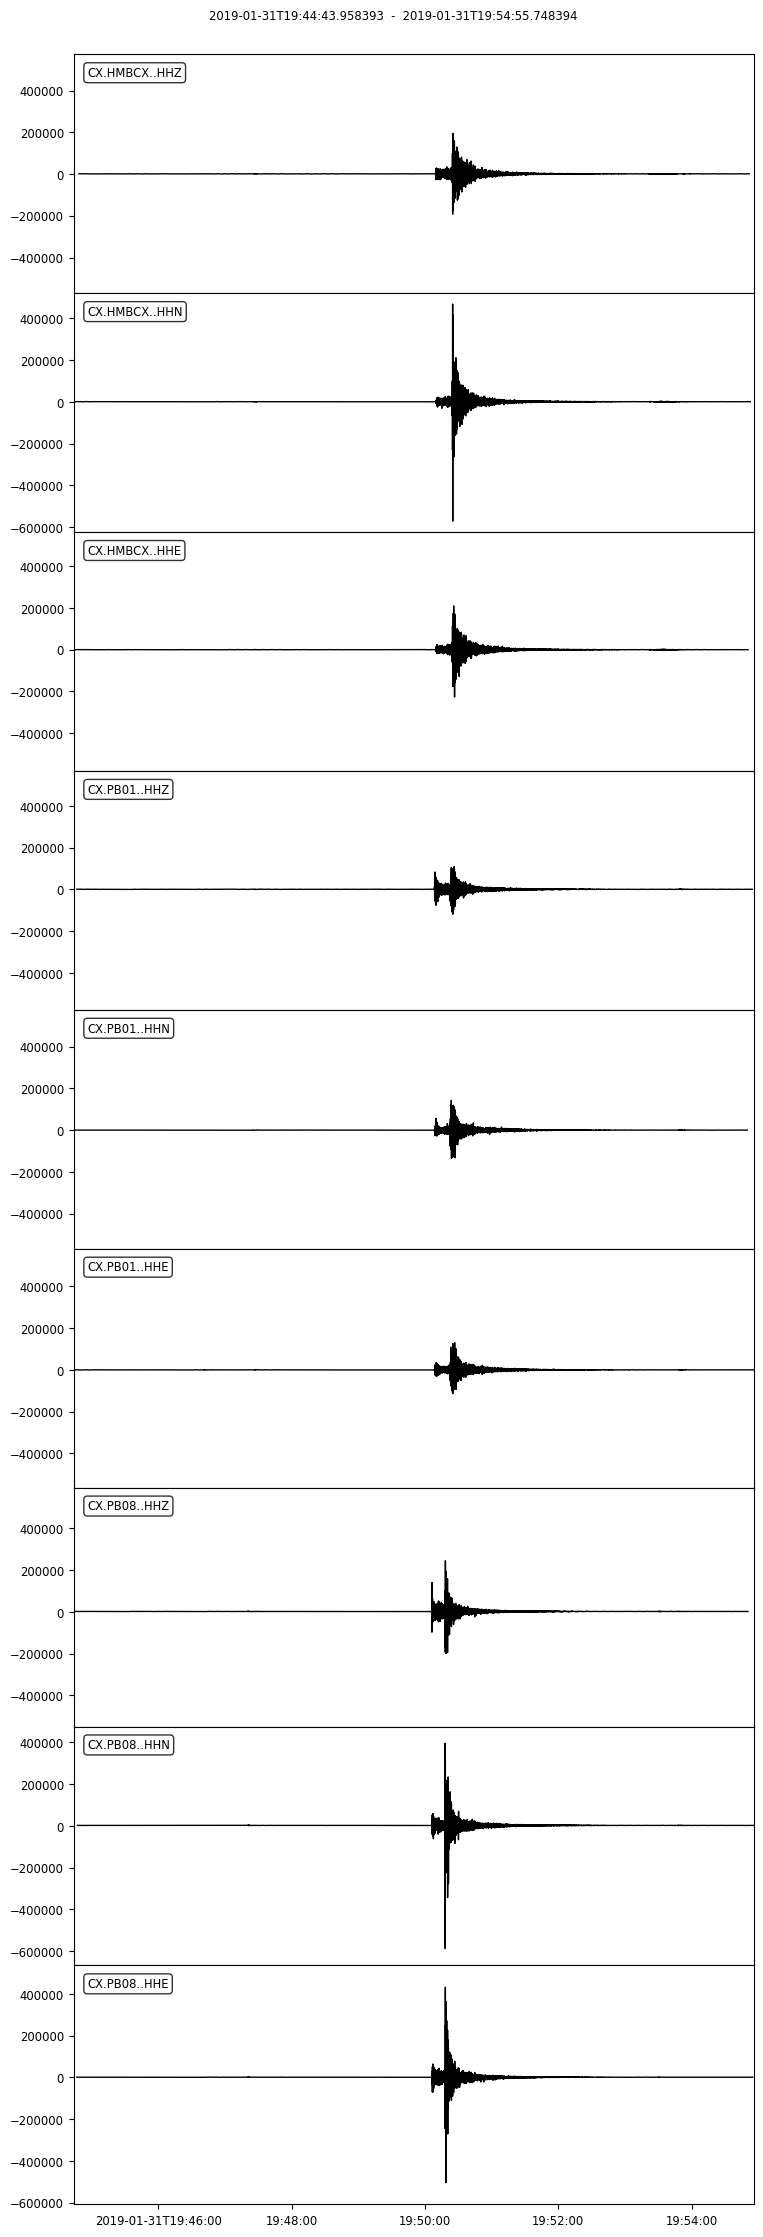

9 Trace(s) in Stream:
CX.HMBCX..HHE | 2019-01-31T19:44:44.679999Z - 2019-01-31T19:54:50.669999Z | 100.0 Hz, 60600 samples
CX.HMBCX..HHN | 2019-01-31T19:44:45.679999Z - 2019-01-31T19:54:52.669999Z | 100.0 Hz, 60700 samples
CX.HMBCX..HHZ | 2019-01-31T19:44:48.679999Z - 2019-01-31T19:54:51.669999Z | 100.0 Hz, 60300 samples
CX.PB01..HHE  | 2019-01-31T19:44:45.158393Z - 2019-01-31T19:54:55.628393Z | 100.0 Hz, 61048 samples
CX.PB01..HHN  | 2019-01-31T19:44:43.958393Z - 2019-01-31T19:54:50.028393Z | 100.0 Hz, 60608 samples
CX.PB01..HHZ  | 2019-01-31T19:44:46.698393Z - 2019-01-31T19:54:54.388393Z | 100.0 Hz, 60770 samples
CX.PB08..HHE  | 2019-01-31T19:44:46.698393Z - 2019-01-31T19:54:54.838393Z | 100.0 Hz, 60815 samples
CX.PB08..HHN  | 2019-01-31T19:44:47.448394Z - 2019-01-31T19:54:55.748394Z | 100.0 Hz, 60831 samples
CX.PB08..HHZ  | 2019-01-31T19:44:44.298393Z - 2019-01-31T19:54:50.558393Z | 100.0 Hz, 60627 samples

In [7]:
#eq_with_data = os.listdir('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/other/data/2019_01_01/')
#eq_with_data = os.listdir('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/')
eq_name = eq_with_data[0]
data = obspy.read(root+eq_name+'/data/*/*')
data.plot()
inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
data.remove_response(inv)
# data.plot()

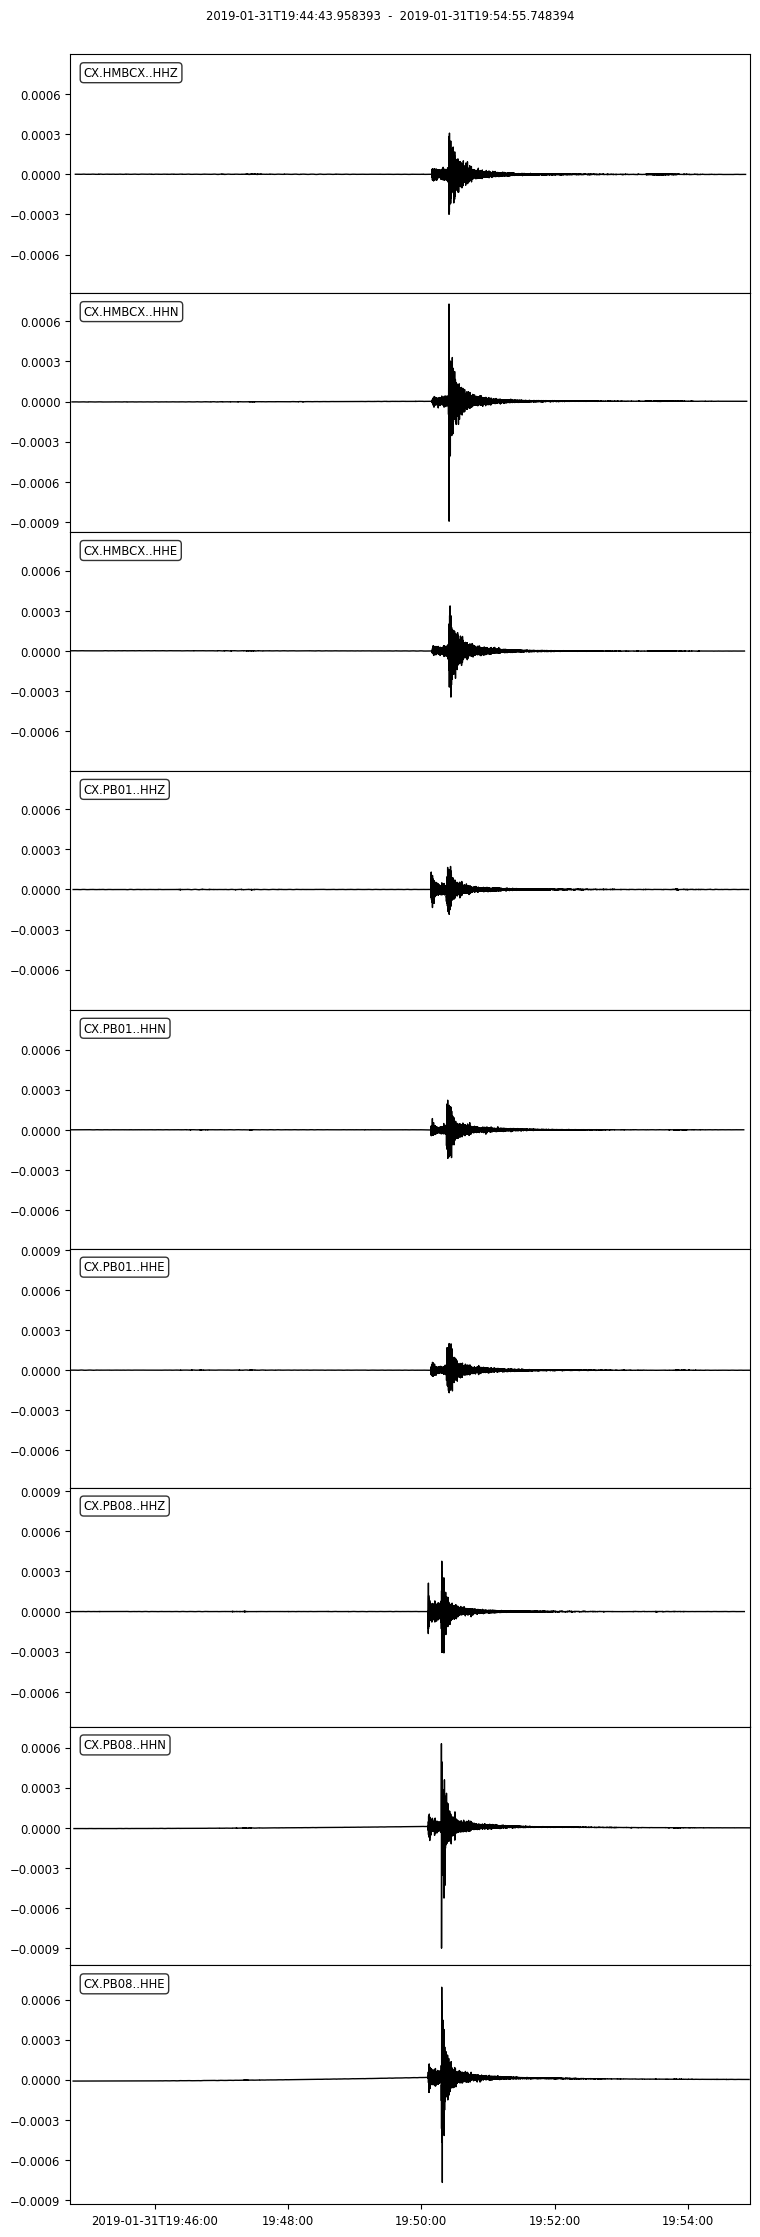

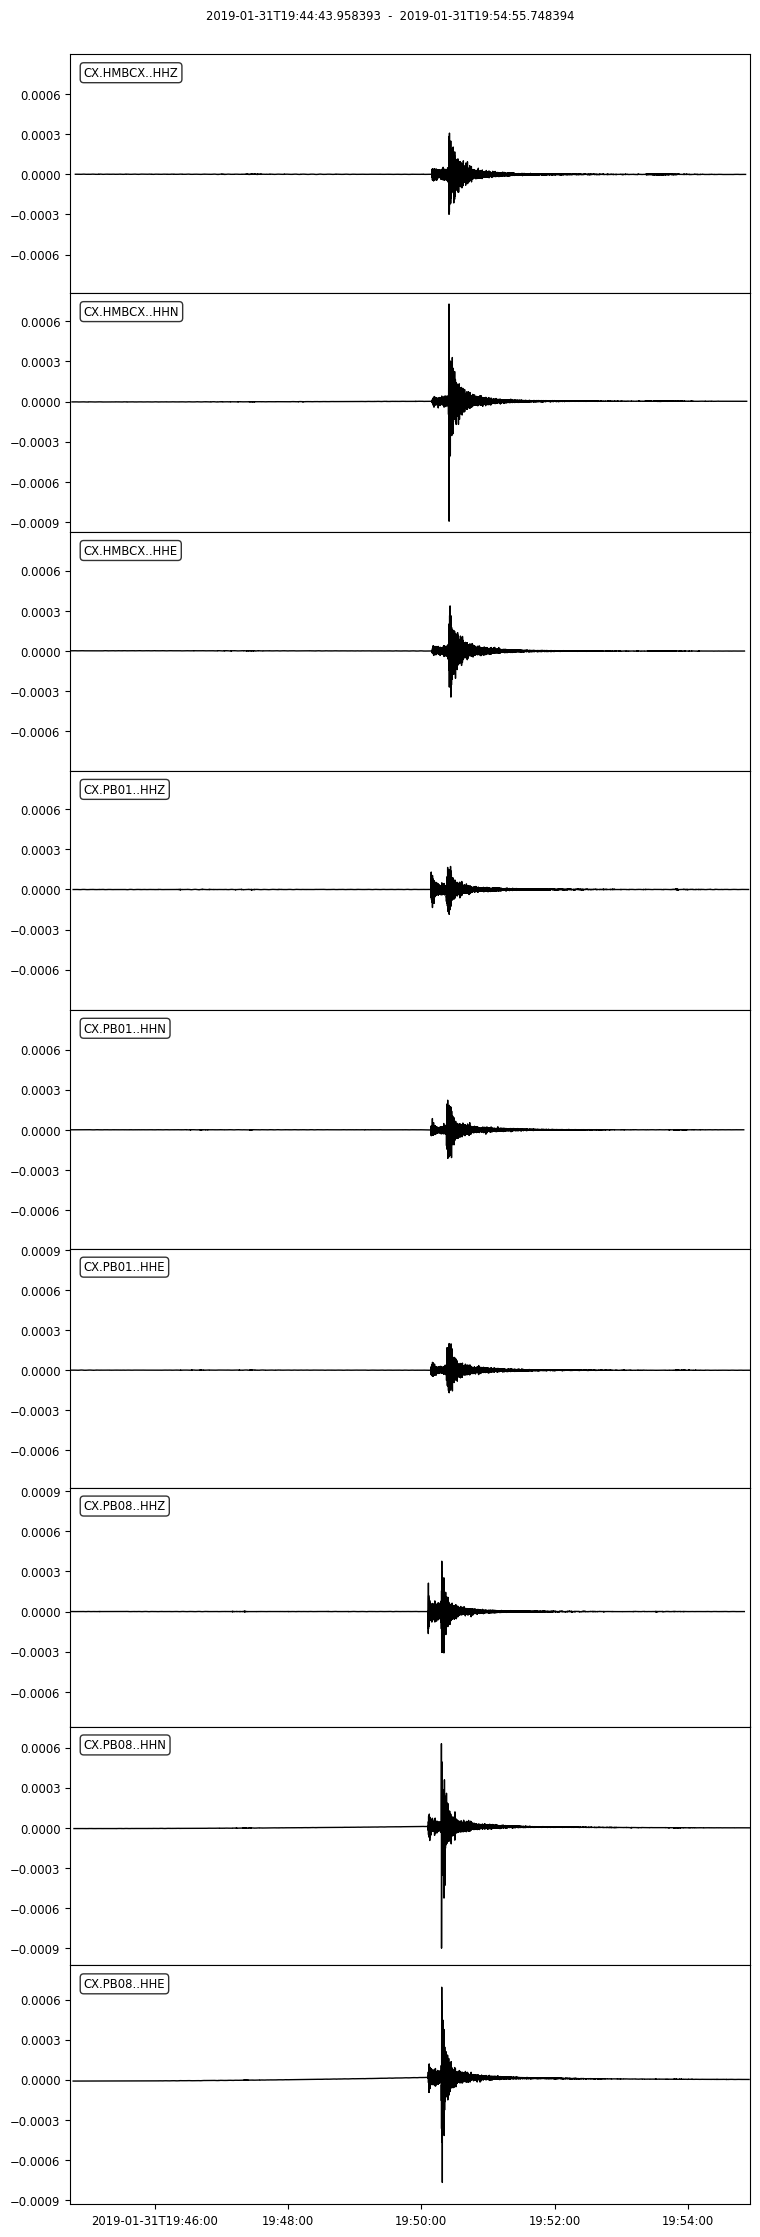

In [8]:
inv
tr_no = 0
data.plot()

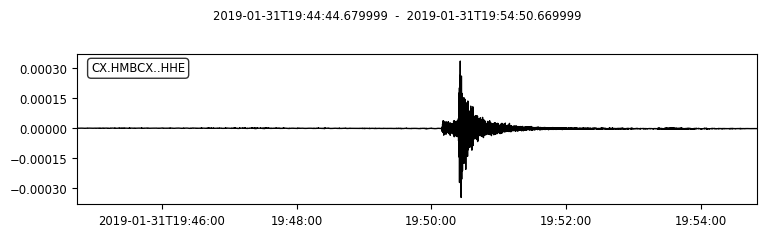

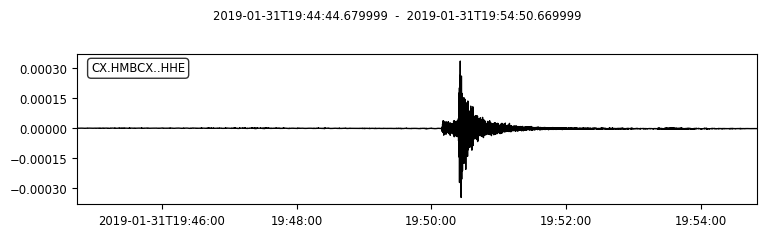

In [9]:
with open(root+eq_name+'/picks.pkl', 'rb') as f:
    picks = pickle.load(f)
sr = data[tr_no].stats.sampling_rate
tr_name = data[tr_no].stats.network+'.'+data[tr_no].stats.station+'.'+data[tr_no].stats.location
pick = UTCDateTime(picks[tr_name])
start = int((pick - data[tr_no].stats.starttime)*sr)
end = int(start + 4 * sr)
s = data[tr_no].copy()#.filter('lowpass', freq=3)
s.plot()

detrend

In [ ]:
coda = signal.detrend(s)
plt.plot(coda)
coda = s[start:end+1000]
plt.plot(coda)
start

taper and pad with zeros

In [ ]:
nx      = len(coda)
hann    = np.hanning(nx) #Is this the right sort of filter?
nx2     = 2*nx
x       = np.zeros(nx2)

x[0:nx] = coda*hann
plt.plot(x)

smooth

In [ ]:
s.stats

In [ ]:
#%matplotlib widget
ft_x  = scipy.fft.fft(x,nx2)
Pxx   = abs(ft_x)**2
dt = s.stats.delta

Pfreq  = scipy.fft.rfftfreq(nx2,dt)#getting the frequencies to plot on the xaxis 
Pnf    = len(Pfreq)

nsmooth = 30
Pxx_smooth = np.convolve(Pxx, np.ones(nsmooth)/nsmooth)
#Because of the variance of spectral estimates, smoothing is necesary. We do this using a running window convolution. 
#It is a rough way to do it, you can choose better ways.



plt.loglog(Pfreq,Pxx_smooth[0:Pnf])
plt.xlabel('Frequency (Hz)');
plt.ylabel('A^2');
plt.title('velocity spectra');
plt.xlim(dt, 55)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(Pfreq,Pxx[0:Pnf])
ax.set_xlabel('Frequency (Hz)');
ax.set_ylabel('A^2');
ax.set_title('velocity spectra, no smoothing');
ax.set_xlim(dt, 55)

In [ ]:
#%matplotlib widget 
# Number of sample points
N = 400
# sample spacing
T = 1/sr

x = np.linspace(0.0, N*T, N, endpoint=False)
y = s.data#[start:end+1000]

yf = rfft(y) #instead of fft as data type of y is real
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), marker='o') #what does this 2/N do???
plt.grid()
plt.show()

In [ ]:
%%script false --no-raise-error
from earthquake import earthquake
c = cat_with_data.copy()
c.clear()
c.extend([cat_with_data[0]])
eq = earthquake(eq_name, c, data, picks, sensor_types = [])
eq.calc_Tpmax()
eq.calc_Tc()
print(eq._cached_params["tau_p_max"])
print(eq._cached_params["tau_c"])

## on displacement

In [30]:
with open(root+eq_name+'/picks.pkl', 'rb') as f:
    picks = pickle.load(f)
sr = data[tr_no].stats.sampling_rate
tr_name = data[tr_no].stats.network+'.'+data[tr_no].stats.station+'.'+data[tr_no].stats.location
pick = UTCDateTime(picks[tr_name])
start = int((pick - data[tr_no].stats.starttime)*sr)
end = int(start + 4 * sr)
d = data[tr_no].copy().filter('lowpass', freq=10)
d.filter('highpass', freq=0.1)
d.detrend()
d.integrate()

CX.HMBCX..HHE | 2019-01-31T19:44:44.679999Z - 2019-01-31T19:54:50.669999Z | 100.0 Hz, 60600 samples

detrend

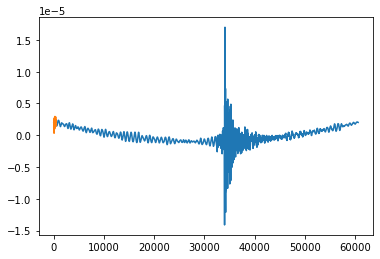

In [31]:
coda = signal.detrend(d)
plt.plot(coda)
coda = d[start:end]
plt.plot(coda)

taper and pad with zeros

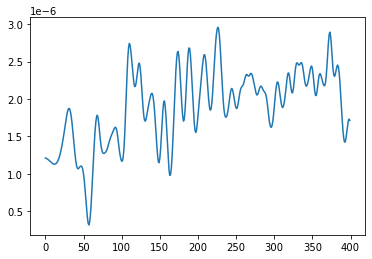

In [32]:
plt.plot(coda)

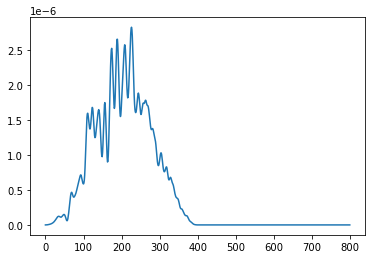

In [33]:
nx      = len(coda)
hann    = np.hanning(nx) #Is this the right sort of filter?
nx2     = 2*nx
x       = np.zeros(nx2)

x[0:nx] = coda*hann
plt.plot(x)

smooth

In [34]:
s.stats

         network: CX
         station: HMBCX
        location: 
         channel: HHE
       starttime: 2019-01-31T19:44:44.679999Z
         endtime: 2019-01-31T19:54:50.669999Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60600
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 176, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 90112})
      processing: ["ObsPy 1.2.2: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7f59f00c1760>::output='VEL'::plot=False::pre_filt=None::taper=True::taper_fraction=0.05::water_level=60::zero_mean=True)"]

In [35]:
'''ft_x  = scipy.fft.fft(x,nx2)
Pxx   = abs(ft_x)**2
dt = s.stats.delta

Pfreq  = scipy.fft.rfftfreq(nx2,dt)#getting the frequencies to plot on the xaxis 
Pnf    = len(Pfreq)

nsmooth = 30
Pxx_smooth = np.convolve(Pxx, np.ones(nsmooth)/nsmooth)
#Because of the variance of spectral estimates, smoothing is necesary. We do this using a running window convolution. 
#It is a rough way to do it, you can choose better ways.


fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(Pfreq,Pxx_smooth[0:Pnf])
ax.set_xlabel('Frequency (Hz)');
ax.set_ylabel('A^2');
ax.set_title('displacement spectra');
ax.set_xlim(dt, 55)'''

"ft_x  = scipy.fft.fft(x,nx2)\nPxx   = abs(ft_x)**2\ndt = s.stats.delta\n\nPfreq  = scipy.fft.rfftfreq(nx2,dt)#getting the frequencies to plot on the xaxis \nPnf    = len(Pfreq)\n\nnsmooth = 30\nPxx_smooth = np.convolve(Pxx, np.ones(nsmooth)/nsmooth)\n#Because of the variance of spectral estimates, smoothing is necesary. We do this using a running window convolution. \n#It is a rough way to do it, you can choose better ways.\n\n\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.loglog(Pfreq,Pxx_smooth[0:Pnf])\nax.set_xlabel('Frequency (Hz)');\nax.set_ylabel('A^2');\nax.set_title('displacement spectra');\nax.set_xlim(dt, 55)"

multitaper from alice

(512,)


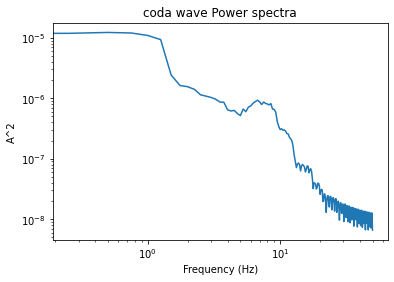

In [36]:
%matplotlib inline 
from spectrum import *
from pylab import *

dt = d.stats.delta
#creating the frequencies to plot on x axis 
Pfreq  = scipy.fft.rfftfreq(len(coda),dt)

#doing the multitaper to get the spectra 
N = len(coda)
NW=4.5
k=8
[tapers, eigen] = dpss(N, NW, k)
Sk_complex, weights, eigenvalues=pmtm(coda, e=eigen, v=tapers, show=False)
Sk = abs(Sk_complex)
Sk = np.mean(Sk,axis =0)
Sk_sdv = np.std(Sk,axis =0)


#plotting the spectra in loglog
plt.loglog(Pfreq[:-1],Sk[0:N//2])
#plt.fill_between(Pfreq[:-1],(Sk+Sk_sdv)[0:N//2],(Sk-Sk_sdv)[0:N//2],alpha=0.2)
plt.xlabel('Frequency (Hz)');
plt.ylabel('A^2');
plt.title('coda wave Power spectra');

Pfreq_MHZ = Pfreq
Sk_MHZ = Sk 

print(Sk_MHZ.shape)
plt.show()

[ 1.          1.          0.99999993  0.99999775  0.99995163  0.99924508
  0.99140326  0.93279503]
plot
(512,)


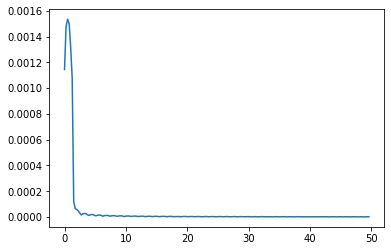

In [28]:
d = data[tr_no].copy()#.filter('lowpass', freq=3)
d.filter('highpass', freq=0.1)
d.detrend()
d.integrate()

coda = signal.detrend(d)
#plt.plot(coda)
start = pick #int((pick - data[tr_no].stats.starttime)*sr)
end = pick + 4 # int(start + 4 * sr)
coda = d.trim(start, end)
#plt.plot(coda)
nx = len(coda)
hann = np.hanning(nx) #Is this the right sort of filter?
nx2 = 2*nx
x = np.zeros(nx2)

x[0:nx] = coda.data*hann
#plt.plot(x, label = 'x')
dt = d.stats.delta

#creating the frequencies to plot on x axis 
Pfreq  = scipy.fft.rfftfreq(len(coda),dt)

#doing the multitaper to get the spectra 
N = len(coda)
NW=4.5
k=8
[tapers, eigen] = dpss(N, NW, k)
print(eigen)
freq_complex, weights, eigenvalues=pmtm(coda, e=eigen, v=tapers, show=False)
freq = abs(freq_complex)
freq = np.mean(freq,axis =0)
freq_sdv = np.std(freq,axis =0)


#plotting the spectra in loglog
print('plot')
plt.plot(Pfreq[:-1],freq[0:N//2], label=tr_name + data[tr_no].stats.channel)
#plt.fill_between(Pfreq[:-1],(Sk+Sk_sdv)[0:N//2],(Sk-Sk_sdv)[0:N//2],alpha=0.2)
#axs.set_xlabel('Frequency (Hz)');
#axs.set_ylabel('A^2');
#plt.title(tr_name + data[tr_no].stats.channel+' coda wave Power spectra');


Pfreq_MHZ = Pfreq
freq_MHZ = freq 

print(freq_MHZ.shape)